In [1]:
#Bib necessaria para a leitura da API.
import requests

#Bib responsavel pela criação de data frames.
import pandas as pd

import numpy as np

#Bib responsavel pela criação de gráficos.
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#End point da API, como dois parametros, "start" e "number".

root = 'https://apitempo.inmet.gov.br/estacoes/T'
#Usando uma requisição GET para exportação dos dados, estes que estão no formato JSON.
data = requests.get(root)
data = data.json()

#Primeira visualização dos dados, ainda no formato de lista de JSONs, 
#será analisando apenas o primeiro conjunto de dados.
data[0]

{'CD_OSCAR': '0-2000-0-86765',
 'DC_NOME': 'ABROLHOS',
 'FL_CAPITAL': 'N',
 'DT_FIM_OPERACAO': None,
 'CD_SITUACAO': 'Pane',
 'TP_ESTACAO': 'Automatica',
 'VL_LATITUDE': '-17.96305555',
 'CD_WSI': '0-76-0-2906907000000408',
 'CD_DISTRITO': ' 04',
 'VL_ALTITUDE': '20.93',
 'SG_ESTADO': 'BA',
 'SG_ENTIDADE': 'INMET',
 'CD_ESTACAO': 'A422',
 'VL_LONGITUDE': '-38.70333333',
 'DT_INICIO_OPERACAO': '2008-07-20T21:00:00.000-03:00'}

In [3]:
#Criando um dataframe.
data = pd.json_normalize(data)
data

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-86765,ABROLHOS,N,None,Pane,Automatica,-17.96305555,0-76-0-2906907000000408,04,20.93,BA,INMET,A422,-38.70333333,2008-07-20T21:00:00.000-03:00
1,0-2000-0-81755,ACARAU,N,None,Pane,Automatica,-3.1211111,0-76-0-2300200000000446,03,67.15,CE,INMET,A360,-40.08722221,2009-04-21T21:00:00.000-03:00
2,0-2000-0-86827,AFONSO CLAUDIO,None,None,Operante,Automatica,-20.10416666,0-76-0-3200102000000478,06,507.48,ES,INMET,A657,-41.10694444,2011-09-23T21:00:00.000-03:00
3,0-2000-0-86686,AGUA BOA,N,None,Pane,Automatica,-14.01638888,0-76-0-5100201000000157,09,440,MT,INMET,A908,-52.21166666,2006-12-15T21:00:00.000-03:00
4,0-2000-0-86812,AGUA CLARA,N,None,Operante,Automatica,-20.44444444,0-76-0-5000203000000463,07,323.63,MS,INMET,A756,-52.87583332,2010-08-13T21:00:00.000-03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0-2000-0-86697,VITORIA DA CONQUISTA,N,None,Operante,Automatica,-14.88638888,0-76-0-2933307000000204,04,879.38,BA,INMET,A414,-40.80138888,2007-05-31T21:00:00.000-03:00
603,0-2000-0-86815,VOTUPORANGA,N,None,Operante,Automatica,-20.40333333,0-76-0-3557105000000154,07,510.37,SP,INMET,A729,-49.96611111,2006-12-03T21:00:00.000-03:00
604,0-2000-0-86940,XANXERE,N,None,Operante,Automatica,-26.938666,0-76-0-4219507000000318,08,878.74,SC,INMET,A858,-52.39809,2008-03-14T21:00:00.000-03:00
605,0-2000-0-81896,XINGUARA,N,None,Operante,Automatica,-7.110518,0-76-0-1508407000000527,02,245,PA,INMET,A247,-49.926072,2016-09-10T21:00:00.000-03:00


In [4]:
'''
Para que se possa fazer uma melhor analise de dados, primeiramente os dados sofrerão uma tranformação de acordo com o seu tipo.
'''

#Convertendo dados para que se possa fazer uma analise.
data['VL_LATITUDE'] = pd.to_numeric(data['VL_LATITUDE'])
data['VL_ALTITUDE'] = pd.to_numeric(data['VL_ALTITUDE'])
data['VL_LONGITUDE'] = pd.to_numeric(data['VL_LONGITUDE'])
data['CD_DISTRITO'] = pd.to_numeric(data['CD_DISTRITO'])

#Convertendo esta coluna para dados dito tempo, e escolhendo ela para ser o index.
data['DT_INICIO_OPERACAO'] = pd.to_datetime(data['DT_INICIO_OPERACAO'])
data = data.set_index(data['DT_INICIO_OPERACAO'])

data

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
DT_INICIO_OPERACAO,,,,,,,,,,,,,,,
2008-07-20 21:00:00-03:00,0-2000-0-86765,ABROLHOS,N,None,Pane,Automatica,-17.963056,0-76-0-2906907000000408,4,20.93,BA,INMET,A422,-38.703333,2008-07-20 21:00:00-03:00
2009-04-21 21:00:00-03:00,0-2000-0-81755,ACARAU,N,None,Pane,Automatica,-3.121111,0-76-0-2300200000000446,3,67.15,CE,INMET,A360,-40.087222,2009-04-21 21:00:00-03:00
2011-09-23 21:00:00-03:00,0-2000-0-86827,AFONSO CLAUDIO,None,None,Operante,Automatica,-20.104167,0-76-0-3200102000000478,6,507.48,ES,INMET,A657,-41.106944,2011-09-23 21:00:00-03:00
2006-12-15 21:00:00-03:00,0-2000-0-86686,AGUA BOA,N,None,Pane,Automatica,-14.016389,0-76-0-5100201000000157,9,440.00,MT,INMET,A908,-52.211667,2006-12-15 21:00:00-03:00
2010-08-13 21:00:00-03:00,0-2000-0-86812,AGUA CLARA,N,None,Operante,Automatica,-20.444444,0-76-0-5000203000000463,7,323.63,MS,INMET,A756,-52.875833,2010-08-13 21:00:00-03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-05-31 21:00:00-03:00,0-2000-0-86697,VITORIA DA CONQUISTA,N,None,Operante,Automatica,-14.886389,0-76-0-2933307000000204,4,879.38,BA,INMET,A414,-40.801389,2007-05-31 21:00:00-03:00
2006-12-03 21:00:00-03:00,0-2000-0-86815,VOTUPORANGA,N,None,Operante,Automatica,-20.403333,0-76-0-3557105000000154,7,510.37,SP,INMET,A729,-49.966111,2006-12-03 21:00:00-03:00
2008-03-14 21:00:00-03:00,0-2000-0-86940,XANXERE,N,None,Operante,Automatica,-26.938666,0-76-0-4219507000000318,8,878.74,SC,INMET,A858,-52.398090,2008-03-14 21:00:00-03:00


In [5]:
data.describe()

,VL_LATITUDE,CD_DISTRITO,VL_ALTITUDE,VL_LONGITUDE
count,607.000000,607.000000,589.000000,607.000000
mean,-15.630180,6.609555,418.343786,-48.402892
std,8.299976,5.411524,344.610457,7.250650
min,-33.742222,1.000000,2.000000,-72.786667
25%,-22.214555,3.000000,132.110000,-52.947623
50%,-16.166773,6.000000,367.010000,-48.201111
75%,-8.698194,8.000000,636.170000,-42.903534
max,4.477500,33.000000,2450.000000,-34.815556


In [6]:
#Definindo funções detectores de possiveis valores espúrios.
def outliers_inferiores(data):
    """outliers inferiores"""
    std = data.std()   #desvio padrao
    mean = data.mean() #média
    inferior = mean - 2*std #limite inferior
    outliers_inf = []
    for x in data:
        if inferior>x:
            outliers_inf.append(x)
        
    return outliers_inf

def outliers_superior(data):
    """outliers superiores"""
    std = data.std()   #desvio padrao
    mean = data.mean() #média
    superior = mean + 2*std  #limite superior 
    outliers_superior = []
    for x in data:
        if superior<x:
            outliers_superior.append(x)
        
    return outliers_superior

In [7]:
outliers_inferiores(data['VL_LATITUDE'])

[-32.53472221, -33.74222221]

In [28]:
outliers_superior(data['VL_LATITUDE'])

[2.81694443, 3.35888888, 3.81361111, 4.4775]

In [10]:
#Contagem de dados não nulos de todas as colunas.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 2008-07-20 21:00:00-03:00 to 2019-09-17 21:00:00-03:00
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CD_OSCAR            540 non-null    object 
 1   DC_NOME             607 non-null    object 
 2   FL_CAPITAL          495 non-null    object 
 3   DT_FIM_OPERACAO     0 non-null      object 
 4   CD_SITUACAO         607 non-null    object 
 5   TP_ESTACAO          607 non-null    object 
 6   VL_LATITUDE         607 non-null    float64
 7   CD_WSI              570 non-null    object 
 8   CD_DISTRITO         607 non-null    int64  
 9   VL_ALTITUDE         589 non-null    float64
 10  SG_ESTADO           607 non-null    object 
 11  SG_ENTIDADE         607 non-null    object 
 12  CD_ESTACAO          607 non-null    object 
 13  VL_LONGITUDE        607 non-null    float64
 14  DT_INICIO_OPERACAO  607 non-null    object 
dtypes: float64(3), i

In [11]:
#A coluna 'CD_WSI' tem 37 dados nulos;
#A coluna 'FL_CAPITAL' tem 112 dados nulos;
#A coluna 'DT_FIM_OPERACAO' tem todos os dados nulos.


"\nA coluna 'CD_WSI' tem 37 dados nulos;\nA coluna 'FL_CAPITAL' tem 112 dados nulos;\nA coluna 'DT_FIM_OPERACAO' tem todos os dados nulos.\n"

In [12]:
#Aqui será usado end points de duas estações, primeiramente vamos usar apenas os dados da estação A301.
root_A301 = 'https://apitempo.inmet.gov.br/estacao/diaria/2019-11-29/2019-12-12/A301'


#Usando uma requisição GET para exportação dos dados, estes que estão no formato JSON.
data_A301 = requests.get(root_A301)
data_A301 = data_A301.json()


#Primeira visualização dos dados, ainda no formato JSON.
data_A301[0]

{'UMID_MED': '71.3',
 'DT_MEDICAO': '2019-11-29',
 'DC_NOME': 'RECIFE',
 'UMID_MIN': '47',
 'TEMP_MED': '26.2',
 'CHUVA': '0',
 'VL_LATITUDE': '-8.05916666',
 'TEMP_MIN': '20.4',
 'TEMP_MAX': '32.1',
 'UF': 'PE',
 'VEL_VENTO_MED': None,
 'CD_ESTACAO': 'A301',
 'VL_LONGITUDE': '-34.95916666'}

In [13]:
data_A301 = pd.json_normalize(data_A301)
data_A301

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,71.3,2019-11-29,RECIFE,47,26.2,0,-8.05916666,20.4,32.1,PE,None,A301,-34.95916666
1,67.7,2019-11-30,RECIFE,41,26.8,0,-8.05916666,20.8,32.7,PE,None,A301,-34.95916666
2,72.1,2019-12-01,RECIFE,48,26.6,0,-8.05916666,21.3,32.5,PE,None,A301,-34.95916666
3,71.6,2019-12-02,RECIFE,50,27.1,0,-8.05916666,21.2,33.1,PE,None,A301,-34.95916666
4,69.2,2019-12-03,RECIFE,48,27.5,0,-8.05916666,22.2,32.8,PE,None,A301,-34.95916666
5,67.6,2019-12-04,RECIFE,48,27.3,0,-8.05916666,22.3,32.2,PE,None,A301,-34.95916666
6,69.3,2019-12-05,RECIFE,44,26.7,0,-8.05916666,21.6,32.5,PE,None,A301,-34.95916666
7,70.9,2019-12-06,RECIFE,52,27.7,0,-8.05916666,22.8,33.2,PE,None,A301,-34.95916666
8,71,2019-12-07,RECIFE,48,28.2,0,-8.05916666,23.2,33.8,PE,None,A301,-34.95916666
9,68.9,2019-12-08,RECIFE,48,28.5,0,-8.05916666,23.5,33.7,PE,None,A301,-34.95916666


In [14]:
#Convertendo dados para que se possa fazer uma analise.
data_A301['UMID_MED'] = pd.to_numeric(data_A301['UMID_MED'])
data_A301['UMID_MIN'] = pd.to_numeric(data_A301['UMID_MIN'])
data_A301['TEMP_MED'] = pd.to_numeric(data_A301['TEMP_MED'])
data_A301['CHUVA'] = pd.to_numeric(data_A301['CHUVA'])
data_A301['VL_LATITUDE'] = pd.to_numeric(data_A301['VL_LATITUDE'])
data_A301['TEMP_MIN'] = pd.to_numeric(data_A301['TEMP_MIN'])
data_A301['TEMP_MAX'] = pd.to_numeric(data_A301['TEMP_MAX'])
data_A301['VL_LONGITUDE'] = pd.to_numeric(data_A301['VL_LONGITUDE'])

#Convertendo esta coluna para dados dito tempo, e escolhendo ela para ser o index.
data_A301['DT_MEDICAO'] = pd.to_datetime(data_A301['DT_MEDICAO'])
data_A301 = data_A301.set_index(data_A301['DT_MEDICAO'])

In [15]:
data_A301

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
DT_MEDICAO,,,,,,,,,,,,,
2019-11-29,71.3,2019-11-29,RECIFE,47,26.2,0.0,-8.059167,20.4,32.1,PE,None,A301,-34.959167
2019-11-30,67.7,2019-11-30,RECIFE,41,26.8,0.0,-8.059167,20.8,32.7,PE,None,A301,-34.959167
2019-12-01,72.1,2019-12-01,RECIFE,48,26.6,0.0,-8.059167,21.3,32.5,PE,None,A301,-34.959167
2019-12-02,71.6,2019-12-02,RECIFE,50,27.1,0.0,-8.059167,21.2,33.1,PE,None,A301,-34.959167
2019-12-03,69.2,2019-12-03,RECIFE,48,27.5,0.0,-8.059167,22.2,32.8,PE,None,A301,-34.959167
2019-12-04,67.6,2019-12-04,RECIFE,48,27.3,0.0,-8.059167,22.3,32.2,PE,None,A301,-34.959167
2019-12-05,69.3,2019-12-05,RECIFE,44,26.7,0.0,-8.059167,21.6,32.5,PE,None,A301,-34.959167
2019-12-06,70.9,2019-12-06,RECIFE,52,27.7,0.0,-8.059167,22.8,33.2,PE,None,A301,-34.959167
2019-12-07,71.0,2019-12-07,RECIFE,48,28.2,0.0,-8.059167,23.2,33.8,PE,None,A301,-34.959167


In [16]:
data_A301.describe()

,UMID_MED,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,VL_LONGITUDE
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,69.164286,47.571429,27.321429,0.157143,-8.059167,22.514286,32.635714,-34.959167
std,2.237652,3.155320,0.667001,0.369437,0.000000,1.396621,0.675514,0.000000
min,63.400000,41.000000,26.200000,0.000000,-8.059167,20.400000,31.200000,-34.959167
25%,68.275000,47.000000,26.800000,0.000000,-8.059167,21.375000,32.225000,-34.959167
50%,69.050000,48.000000,27.350000,0.000000,-8.059167,22.550000,32.550000,-34.959167
75%,70.975000,49.500000,27.675000,0.000000,-8.059167,23.200000,33.025000,-34.959167
max,72.100000,52.000000,28.500000,1.200000,-8.059167,25.500000,33.800000,-34.959167


In [17]:
#A coluna 'VEL_VENTO_MED' tem todos os dados nulos.
data_A301.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2019-11-29 to 2019-12-12
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UMID_MED       14 non-null     float64       
 1   DT_MEDICAO     14 non-null     datetime64[ns]
 2   DC_NOME        14 non-null     object        
 3   UMID_MIN       14 non-null     int64         
 4   TEMP_MED       14 non-null     float64       
 5   CHUVA          14 non-null     float64       
 6   VL_LATITUDE    14 non-null     float64       
 7   TEMP_MIN       14 non-null     float64       
 8   TEMP_MAX       14 non-null     float64       
 9   UF             14 non-null     object        
 10  VEL_VENTO_MED  0 non-null      object        
 11  CD_ESTACAO     14 non-null     object        
 12  VL_LONGITUDE   14 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 1.5+ KB


In [18]:
#Aqui será usado end points de duas estações, primeiramente vamos usar apenas os dados da estação A422.
root_A422 = 'https://apitempo.inmet.gov.br/estacao/diaria/2019-11-29/2019-12-12/A422'

#Usando uma requisição GET para exportação dos dados, estes que estão no formato JSON.
data_A422 = requests.get(root_A422)
data_A422 = data_A422.json()

#Primeira visualização dos dados, ainda no formato JSON.
data_A422[0]

{'UMID_MED': '86',
 'DT_MEDICAO': '2019-11-29',
 'DC_NOME': 'ABROLHOS',
 'UMID_MIN': '80',
 'TEMP_MED': '26.3',
 'CHUVA': '0',
 'VL_LATITUDE': '-17.96305555',
 'TEMP_MIN': '25.4',
 'TEMP_MAX': '27.8',
 'UF': 'BA',
 'VEL_VENTO_MED': '6.5',
 'CD_ESTACAO': 'A422',
 'VL_LONGITUDE': '-38.70333333'}

In [19]:
#Usando a estação 'A422' para plotar um grafico da variavel 'TEMP_MAX'.
data_A422 = pd.json_normalize(data_A422)
data_A422

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,86,2019-11-29,ABROLHOS,80,26.3,0,-17.96305555,25.4,27.8,BA,6.5,A422,-38.70333333
1,85.5,2019-11-30,ABROLHOS,78,26.3,0.8,-17.96305555,25.1,27.5,BA,6.5,A422,-38.70333333
2,87.1,2019-12-01,ABROLHOS,84,26.4,None,-17.96305555,25.9,27.1,BA,9.7,A422,-38.70333333
3,77.4,2019-12-02,ABROLHOS,28,26.2,None,-17.96305555,25.7,27,BA,8.3,A422,-38.70333333
4,82.2,2019-12-03,ABROLHOS,13,25.5,None,-17.96305555,24.7,27.5,BA,3.7,A422,-38.70333333
5,80.6,2019-12-04,ABROLHOS,71,25.6,None,-17.96305555,23.6,28,BA,6.6,A422,-38.70333333
6,85.8,2019-12-05,ABROLHOS,81,26.2,None,-17.96305555,25,27.6,BA,6.9,A422,-38.70333333
7,90.2,2019-12-06,ABROLHOS,82,26.2,None,-17.96305555,25.5,26.7,BA,11.3,A422,-38.70333333
8,91.5,2019-12-07,ABROLHOS,83,25.7,None,-17.96305555,25.7,27.5,BA,5.9,A422,-38.70333333
9,83.3,2019-12-08,ABROLHOS,8,24.5,None,-17.96305555,23.6,25.4,BA,4.4,A422,-38.70333333


In [20]:
#Trasformando a coluna 'DT_MEDICAO' no padrao de dados de tempo e setando esta coluna como index

data_A422['DT_MEDICAO'] = pd.to_datetime(data_A422['DT_MEDICAO'])
data_A422 = data_A422.set_index(data_A422['DT_MEDICAO'])
data_A422

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
DT_MEDICAO,,,,,,,,,,,,,
2019-11-29,86,2019-11-29,ABROLHOS,80,26.3,0,-17.96305555,25.4,27.8,BA,6.5,A422,-38.70333333
2019-11-30,85.5,2019-11-30,ABROLHOS,78,26.3,0.8,-17.96305555,25.1,27.5,BA,6.5,A422,-38.70333333
2019-12-01,87.1,2019-12-01,ABROLHOS,84,26.4,None,-17.96305555,25.9,27.1,BA,9.7,A422,-38.70333333
2019-12-02,77.4,2019-12-02,ABROLHOS,28,26.2,None,-17.96305555,25.7,27,BA,8.3,A422,-38.70333333
2019-12-03,82.2,2019-12-03,ABROLHOS,13,25.5,None,-17.96305555,24.7,27.5,BA,3.7,A422,-38.70333333
2019-12-04,80.6,2019-12-04,ABROLHOS,71,25.6,None,-17.96305555,23.6,28,BA,6.6,A422,-38.70333333
2019-12-05,85.8,2019-12-05,ABROLHOS,81,26.2,None,-17.96305555,25,27.6,BA,6.9,A422,-38.70333333
2019-12-06,90.2,2019-12-06,ABROLHOS,82,26.2,None,-17.96305555,25.5,26.7,BA,11.3,A422,-38.70333333
2019-12-07,91.5,2019-12-07,ABROLHOS,83,25.7,None,-17.96305555,25.7,27.5,BA,5.9,A422,-38.70333333


In [21]:
#Da mesma maneira que nas tabelas anteriores, vamos tranformar o tipo dos dados para que a analise possa ser feita.
data_A422['UMID_MED'] = pd.to_numeric(data_A422['UMID_MED'])
data_A422['UMID_MIN'] = pd.to_numeric(data_A422['UMID_MIN'])
data_A422['TEMP_MED'] = pd.to_numeric(data_A422['TEMP_MED'])
data_A422['CHUVA'] = pd.to_numeric(data_A422['CHUVA'])
data_A422['VL_LATITUDE'] = pd.to_numeric(data_A422['VL_LATITUDE'])
data_A422['TEMP_MIN'] = pd.to_numeric(data_A422['TEMP_MIN'])
data_A422['TEMP_MAX'] = pd.to_numeric(data_A422['TEMP_MAX'])
data_A422['VL_LONGITUDE'] = pd.to_numeric(data_A422['VL_LONGITUDE'])

In [22]:
data_A422.describe()

,UMID_MED,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,VL_LONGITUDE
count,14.000000,14.000000,14.000000,2.000000,1.400000e+01,14.000000,14.000000,1.400000e+01
mean,82.900000,58.500000,26.064286,0.400000,-1.796306e+01,25.064286,27.464286,-3.870333e+01
std,5.131801,27.097403,0.573259,0.565685,3.686825e-15,0.784079,0.780145,7.373650e-15
min,73.700000,8.000000,24.500000,0.000000,-1.796306e+01,23.600000,25.400000,-3.870333e+01
25%,79.700000,40.000000,25.825000,0.200000,-1.796306e+01,24.775000,27.200000,-3.870333e+01
50%,82.750000,70.000000,26.200000,0.400000,-1.796306e+01,25.300000,27.550000,-3.870333e+01
75%,85.950000,80.750000,26.375000,0.600000,-1.796306e+01,25.700000,27.800000,-3.870333e+01
max,91.500000,84.000000,26.600000,0.800000,-1.796306e+01,25.900000,28.800000,-3.870333e+01


In [23]:
data_A422.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2019-11-29 to 2019-12-12
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UMID_MED       14 non-null     float64       
 1   DT_MEDICAO     14 non-null     datetime64[ns]
 2   DC_NOME        14 non-null     object        
 3   UMID_MIN       14 non-null     int64         
 4   TEMP_MED       14 non-null     float64       
 5   CHUVA          2 non-null      float64       
 6   VL_LATITUDE    14 non-null     float64       
 7   TEMP_MIN       14 non-null     float64       
 8   TEMP_MAX       14 non-null     float64       
 9   UF             14 non-null     object        
 10  VEL_VENTO_MED  14 non-null     object        
 11  CD_ESTACAO     14 non-null     object        
 12  VL_LONGITUDE   14 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 1.5+ KB


In [24]:
data_A422['TEMP_MAX'] = pd.to_numeric(data_A422['TEMP_MAX'])


<AxesSubplot:xlabel='DT_MEDICAO'>

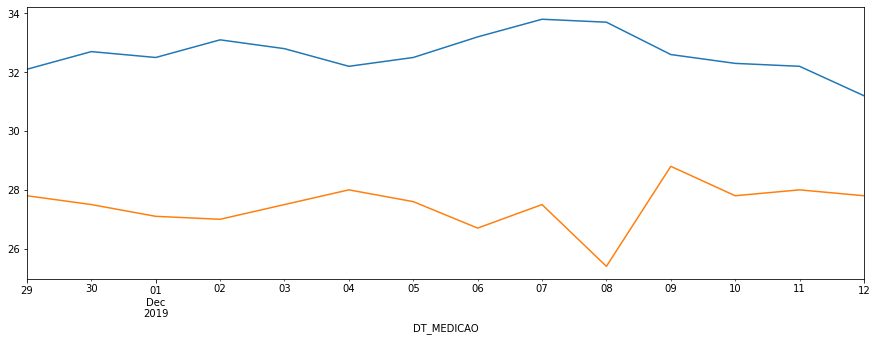

In [25]:
#'TEMP_MAX' nas estações A301 E A422.

data_A301['TEMP_MAX'].plot(figsize=(15, 5))
data_A422['TEMP_MAX'].plot()
